In [3]:
from google.colab import drive
import pandas as pd
import torch, gc
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import io
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [5]:
# Loading CSV
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/My Drive/MLProject/train.csv') 
df_test = pd.read_csv('/content/drive/My Drive/MLProject/test.csv')  

In [7]:
# Examine data set
print(df_train.head())
print(df_train['full_text'][2])

        text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  
0     3.5         3.0          3.0      4.0          3.0  
1     2.5         3.0          2.0      2.0          2.5  
2     3.5         3.0          3.0      3.0          2.5  
3     4.5         4.5          4.5      4.0          5.0  
4     3.0         3.0          3.0      2.5          2.5  
Dear, Principal

If u change the school policy of having a grade b average that unfair. Because many students have a C average. So that means that they cant go out f

In [8]:
# Data pre-processing
# remove '\n \r \w'
df_train['full_text'] = df_train["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
df_test['full_text'] = df_test["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
df_train['full_text'] = df_train["full_text"].replace(re.compile(r'[^\w]'), ' ', regex=True)
df_test['full_text'] = df_test["full_text"].replace(re.compile(r'[^\w]'), ' ', regex=True)

# remove stop words
nltk.download('stopwords')
stop = stopwords.words('english')
df_train['full_text'] = df_train['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test['full_text'] = df_test['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df_train['full_text'][2])

# count max word length
df_train['num_words'] = df_train['full_text'].apply(lambda x: len(x.split()))
max_words = round(df_train['num_words'].max())
print('max word:{}'.format(max_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dear Principal If u change school policy grade b average unfair Because many students C average So means cant go sports activities want bad That like taking everything What kids want become good something cant school policy If C average still able go sports activities A C average bad higher D average If school police D average lower sports activities If D average school working hard means going try hard If C average trying hard able sports activities What good people sports C average school means cant play going lose every game That good policy get grade take away something care Everyone able go sports want If school policy happens schools going boarding students cant go sports activities The students good school feel good take students away others ones If policy student try raised grade cant happens Should think schools boarding If like taking away video games All I saying right go sports activities
max word:672


In [9]:
# tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [71]:
# visualize words after tokenize
train_token = df_train['full_text'].apply(word_tokenize)
test_token = df_test['full_text'].apply(word_tokenize)

print(train_token[0])

['I', 'think', 'students', 'would', 'benefit', 'learning', 'home', 'wont', 'change', 'get', 'early', 'morning', 'shower', 'hair', 'taking', 'classes', 'helps', 'house', 'pay', 'attention', 'comfortable', 'home', 'The', 'hardest', 'part', 'school', 'getting', 'ready', 'wake', 'go', 'brush', 'teeth', 'go', 'closet', 'look', 'cloths', 'think', 'picked', 'outfit', 'u', 'go', 'look', 'mirror', 'youll', 'either', 'like', 'look', 'see', 'stain', 'Then', 'change', 'online', 'classes', 'wear', 'anything', 'stay', 'home', 'wont', 'need', 'stress', 'wear', 'students', 'usually', 'take', 'showers', 'school', 'either', 'take', 'sleep', 'wake', 'students', 'smell', 'good', 'causes', 'miss', 'bus', 'effects', 'lesson', 'time', 'cause', 'come', 'late', 'school', 'u', 'online', 'classes', 'u', 'wont', 'need', 'miss', 'lessons', 'cause', 'get', 'everything', 'set', 'go', 'take', 'shower', 'u', 'get', 'ready', 'go', 'home', 'comfortable', 'pay', 'attention', 'gives', 'advantage', 'smarter', 'even', 'pass

In [85]:
# assign x and y
X = df_train['full_text']
y = df_train[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]

#split train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

print(X_train[0])
print(X_train.shape)
print(y_train.shape)
print(y_val.shape)
print(X_val.shape)
print(y_test.shape)


I think students would benefit learning home wont change get early morning shower hair taking classes helps house pay attention comfortable home The hardest part school getting ready wake go brush teeth go closet look cloths think picked outfit u go look mirror youll either like look see stain Then change online classes wear anything stay home wont need stress wear students usually take showers school either take sleep wake students smell good causes miss bus effects lesson time cause come late school u online classes u wont need miss lessons cause get everything set go take shower u get ready go home comfortable pay attention gives advantage smarter even pass classmates class work public schools difficult even try teacher dont know teach way students understand causes students fail may repeat class
(2502,)
(2502, 6)
(626, 6)
(626,)
(783, 6)


In [86]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers


In [87]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(X_train)
pad_train = pad_sequences(train_seq, maxlen=max_words, truncating='post')

val_seq = tokenizer.texts_to_sequences(X_val)
pad_val = pad_sequences(val_seq, maxlen=max_words, truncating='post')

test_seq = tokenizer.texts_to_sequences(X_test)
pad_test = pad_sequences(test_seq, maxlen=max_words, truncating='post') #max length of word is 1250

print(pad_train[0]) #pad_train is a numpy array
print(pad_train.shape)

## for y, what should be the shape (6 lists each with its output? or m lists each with 6 outputs)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [88]:
word_idx_count = len(word_index)
print(word_idx_count)

16806


In [89]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# def data_sequence(input, label):
#   inout_seq = []
#   for i in range(input.shape[0]):
#     seq = torch.Tensor(input[i,:])
#     target = torch.Tensor(label[i,:])
#     inout_seq.append((seq,target))
#   return inout_seq

# inout_seq = data_sequence(pad_train,y_train)
# val_seq = data_sequence(pad_val,y_val)
# print(inout_seq[3])

batch_size = 4 # hyper parameter

# load dataset
trainX = torch.Tensor(pad_train)
trainY = torch.Tensor(y_train)
train = TensorDataset(trainX, trainY)

valX = torch.Tensor(pad_val)
valY = torch.Tensor(y_val)
val = TensorDataset(valX,valY)

testX = torch.Tensor(pad_test)
testY = torch.Tensor(y_test)
test = TensorDataset(testX,testY)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=1, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

In [90]:

class LSTM_Model(nn.Module):
  def __init__(self):
    super(LSTM_Model, self).__init__()
    self.embeddings = nn.Embedding(word_idx_count+1, 64)
    self.lstm1 = nn.LSTM(input_size=64, hidden_size=64, bidirectional=True, batch_first=True)
    self.lstm2 = nn.LSTM(input_size=128, hidden_size=32, bidirectional=True, batch_first=True)
    self.lstm3 = nn.LSTM(input_size=64, hidden_size=32, bidirectional=True, batch_first=True)
    self.fc1 = torch.nn.Linear(64,64)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(64,32)
    self.fc3 = torch.nn.Linear(32,6)

  def forward(self,inputs):
    embeds = self.embeddings(inputs.to(torch.long))
    h1, states = self.lstm1(embeds)
    h2, states = self.lstm2(h1)  
    h3, states = self.lstm3(h2)
    h3 = h3[:,-1,:]
    h4 = self.fc1(h3)
    h4 = self.relu(h4)
    h4 = self.fc2(h4)
    h4 = self.relu(h4)
    out = self.fc3(h4)
    return out

In [18]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gc.collect()
torch.cuda.empty_cache()
epochs = 30  #hyper parameter
model = LSTM_Model().to(device)
print(model)
print(summary(model,(1,672)))

optimizer = optim.Adam(model.parameters(), lr=0.001) # hyper parameter

mse = nn.MSELoss()
train_loss = []
score = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
train_loss_score = [] # six score loss in each epoch
val_loss_score = [] # six score loss in validation set 
best_val_mse = 10000
     

LSTM_Model(
  (embeddings): Embedding(16807, 64)
  (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
  (lstm2): LSTM(128, 32, batch_first=True, bidirectional=True)
  (lstm3): LSTM(64, 32, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=6, bias=True)
)
Layer (type:depth-idx)                   Output Shape              Param #
LSTM_Model                               [1, 6]                    --
├─Embedding: 1-1                         [1, 672, 64]              1,075,648
├─LSTM: 1-2                              [1, 672, 128]             66,560
├─LSTM: 1-3                              [1, 672, 64]              41,472
├─LSTM: 1-4                              [1, 672, 64]              25,088
├─Linear: 1-5                            [1, 64]                   4,160
├─ReLU: 1-6                              [1, 64] 

In [93]:
def train(train_loader, val_loader, epochs=60, val_epoch=5):

  for epoch in range(epochs):
    batch_loss = []
    for seq, labels in train_loader:
      seq = seq.to(device)
      labels = labels.to(device)
      # model training
      model.train()
      pred = model(seq)

      # append each score into each list
      loss_list = torch.mean(((pred - labels)**2),dim=0).tolist()
      # print(loss_list)
      batch_loss.append(loss_list)

      # backward
      loss = mse(pred, labels)
      # print(f'mse loss {loss}')
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      # #print batch loss
      # for i,s in enumerate(loss_list):
      #   print(f'batch loss {score[i]}: {loss_list[i]}')
    
    #append each epoch score loss
    loss_epoch = np.mean(batch_loss, axis=0)
    for i,s in enumerate(loss_epoch):
      print(f'epoch {epoch} loss {score[i]}: {loss_epoch[i]}')
    train_loss_score.append(loss_epoch)
    train_loss.append(np.mean(loss_epoch))
    print(f'total average loss in epoch {epoch}: {np.mean(loss_epoch)}')

    # validation
    if (epoch+1)%val_epoch == 0:
      val_loss = []
      with torch.no_grad():
        for x_val, y_val in val_loader:
          x_val = x_val.to(device)
          y_val = y_val.to(device)
          model.eval()
          yhat = model(x_val)
          loss_val_list = ((yhat - y_val)**2).tolist()
          val_loss.append(loss_val_list)
      val_loss = np.mean(loss_val_list, axis=0)

      # save best model
      cur_mse = np.mean(val_epoch)
      if(cur_mse < best_val_mse):
        path = '/content/drive/My Drive/MLProject/model2.pt'
        torch.save(model.state_dict(),path)

      #print validation mse
      for i,s in enumerate(val_loss):
        print(f'validation mse {score[i]}: {val_loss[i]}')
      val_loss_score.append(val_loss)


  return train_loss, train_loss_score, val_loss_score

In [94]:
train_loss, train_loss_score, val_loss_score = train(train_loader,val_loader)

epoch 0 loss cohesion: 0.9903113970756531
epoch 0 loss syntax: 0.8580599181491416
epoch 0 loss vocabulary: 1.0148587699233553
epoch 0 loss phraseology: 0.8918904401208274
epoch 0 loss grammar: 0.9908903843526554
epoch 0 loss conventions: 1.035446604347229
total average loss in epoch 0: 0.9635762523281436
epoch 1 loss cohesion: 0.4444972232952714
epoch 1 loss syntax: 0.43542028315309433
epoch 1 loss vocabulary: 0.3539814279115293
epoch 1 loss phraseology: 0.43935654891659504
epoch 1 loss grammar: 0.5047364984950051
epoch 1 loss conventions: 0.47542054128833117
total average loss in epoch 1: 0.44223542050997106
epoch 2 loss cohesion: 0.4291915868550539
epoch 2 loss syntax: 0.4216386672966182
epoch 2 loss vocabulary: 0.3403936645358801
epoch 2 loss phraseology: 0.42519319353401663
epoch 2 loss grammar: 0.4913275032821577
epoch 2 loss conventions: 0.45992308531701565
total average loss in epoch 2: 0.427944616803457
epoch 3 loss cohesion: 0.3802926074206829
epoch 3 loss syntax: 0.3705450344

In [97]:
print(train_loss)
print(train_loss_score)
print(val_loss_score)

[0.9635762523281436, 0.44223542050997106, 0.427944616803457, 0.379295739277328, 0.3223503374284754, 0.27423650786546055, 0.2384145450003445, 0.21007296261480077, 0.20024664319983373, 0.20774422988711547, 0.21892934117331167, 0.20696783918021247, 0.19191629889135556, 0.18150076083000752, 0.17823610582637292, 0.17282350853169337, 0.1687411088389034, 0.16955796583077562, 0.1675990483777132, 0.16681219653480997, 0.16430701493682962, 0.16170485299900175, 0.1561782580629418, 0.14768982449937615, 0.1414437244961659, 0.13970223369287949, 0.13810594582278282, 0.13478452052160475, 0.13031462442645184, 0.12414595041908323, 0.11629992280667649, 0.10763043996623407, 0.10430572158843278, 0.10368991450743441, 0.1063090617413322, 0.10640992857217786, 0.10516136222220958, 0.0995937651234058, 0.09281427179997166, 0.08935787960318849, 0.08475482854132231, 0.08105977612174271, 0.08029754702465919, 0.07924991285265423, 0.07858196819196454, 0.08107964436348992, 0.08468397632154327, 0.08570469255335629, 0.08

In [20]:
# # save model
# path = '/content/drive/My Drive/MLProject/model.pt'
# torch.save(model.state_dict(),path)

In [100]:
# load model
path = '/content/drive/My Drive/MLProject/model2.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

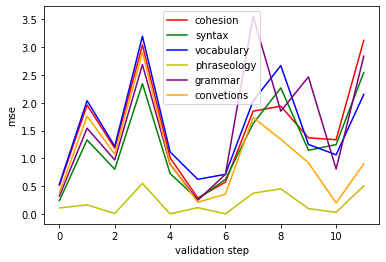

In [101]:
from matplotlib import pyplot as plt
val_loss_score = np.array(val_loss_score)
plt.plot(val_loss_score[:,0],color='r',label='cohesion')
plt.plot(val_loss_score[:,1],color='g',label='syntax')
plt.plot(val_loss_score[:,2],color='b',label='vocabulary')
plt.plot(val_loss_score[:,3],color='y',label='phraseology')
plt.plot(val_loss_score[:,4],color='purple',label='grammar')
plt.plot(val_loss_score[:,5],color='orange',label='convetions')
plt.legend()
plt.xlabel('validation step')
plt.ylabel('mse')
plt.show()

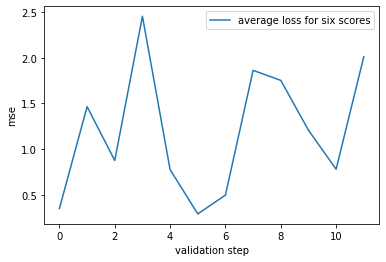

In [98]:
val_avg = np.mean(val_loss_score, axis=1)
plt.plot(val_avg,label='average loss for six scores')
plt.legend()
plt.xlabel('validation step')
plt.ylabel('mse')
plt.show()

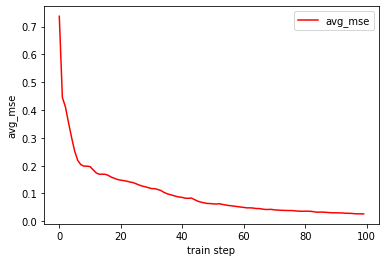

In [61]:
train_loss = np.array(train_loss)
plt.plot(train_loss,color='r',label='avg_mse')
# plt.plot(train_loss[:,0],color='r',label='cohesion')
# plt.plot(train_loss[:,1],color='g',label='syntax')
# plt.plot(train_loss[:,2],color='b',label='vocabulary')
# plt.plot(train_loss[:,3],color='y',label='phraseology')
# plt.plot(train_loss[:,4],color='purple',label='grammar')
# plt.plot(train_loss[:,5],color='orange',label='convetions')
plt.legend()
plt.xlabel('train step')
plt.ylabel('avg_mse')
plt.show()

In [62]:
# on test set

test_X = df_test['full_text'].to_numpy()
x = tokenizer.texts_to_sequences(test_X)
x = pad_sequences(x, maxlen=max_words, truncating='post')

x = torch.Tensor(x)
x = TensorDataset(x)
testloader = DataLoader(x, batch_size=1, shuffle=False, drop_last=True)

results = []
with torch.no_grad():
  for sub in testloader:
    sub = sub[0].to(device)
    model.eval()
    yhat = model(sub).tolist()[0]
    results.append(yhat)

lstm_submission = pd.DataFrame(results, columns=['Cohesion','Syntax','Vocabulary','Phraseology','Grammar','Convention'])
lstm_submission.insert(0, 'text_id', df_test['text_id'])
lstm_submission.head()

,text_id,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Convention
0,0000C359D63E,2.853042,3.096788,3.125971,3.161715,3.546305,2.798627
1,000BAD50D026,2.957783,3.542270,3.631431,3.895051,3.494711,3.712177
2,00367BB2546B,3.175283,3.866588,3.538208,3.538747,3.447996,3.058721


In [102]:
test_loss = []
# on test set in train set
with torch.no_grad():
      for x_val, y_val in test_loader:
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        model.eval()
        yhat = model(x_val)
        loss_test_list = ((yhat - y_val)**2).tolist()
        test_loss.append(loss_test_list)
test_avg_loss = np.mean(test_loss)
print(test_loss)
print(test_avg_loss)

[[[0.10156897455453873, 0.034519363194704056, 0.0003220847574993968, 0.019090818241238594, 0.11035275459289551, 0.010719433426856995]], [[0.5016090273857117, 0.34067416191101074, 0.09374619275331497, 0.45742368698120117, 1.769295573234558, 2.7717843055725098]], [[0.12529969215393066, 0.07029570639133453, 0.011835869401693344, 0.00018105395429302007, 0.2310546338558197, 0.003672451712191105]], [[0.3670596778392792, 0.001608323771506548, 0.5890682339668274, 0.00042570027289912105, 0.3843144178390503, 0.05368652194738388]], [[0.6914228796958923, 2.8725383281707764, 0.14791105687618256, 0.09186678379774094, 0.02306174859404564, 0.4352332353591919]], [[0.03778323158621788, 0.1066068783402443, 0.003791883820667863, 0.1555345356464386, 0.7569748759269714, 0.000918416422791779]], [[0.28253671526908875, 0.47529828548431396, 0.026559164747595787, 0.04244163632392883, 0.011665656231343746, 0.006980558857321739]], [[2.5333399772644043, 0.9816716909408569, 0.3435882329940796, 1.3178657293319702, 2.